In [2]:
import cv2
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE
from keras.callbacks import TensorBoard
from livelossplot.keras import PlotLossesCallback

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report 

import datetime

In [3]:
#matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
    'sans-serif' : 'Georgia'}
        #'weight' : 'bold'}
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (16,8)

S = 15
M = 18
B = 28

lw =5

plt.rc('font', size      = S)          # controls default text sizes
plt.rc('axes', titlesize = B)     # fontsize of the axes title
plt.rc('axes', labelsize = M)    # fontsize of the x and y labels
plt.rc('xtick', labelsize= S)    # fontsize of the tick labels
plt.rc('ytick', labelsize= S)    # fontsize of the tick labels
plt.rc('legend', fontsize= M)    # legend fontsize
plt.rc('figure', titlesize=B)  # fontsize of the figure title

# linewidth

L = 6

# Colors

C1 = '#144974' #(20,73,116)
C2 = '#0070C0'
C3 = '#A0A0A0'

dash = '--'

# legend locations
ul = 'upper left'
ur = 'upper right'

# plot layout

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# grid

plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5


# Test plot

# plt.plot(np.arange(1,100,1),np.arange(1,100,1), label='Label')
# plt.xlabel('X Label')
# plt.ylabel('Y Label')
# plt.title('Title')
# plt.legend(loc='upper left')
# plt.show()

# Load the Data

In [9]:
def get_images():
    full_images, df = get_and_clean_data()
    img_list = np.asarray(full_images[:15000])
    img_list.shape
    temp=[]
    for i in img_list:
        temp.append(cv2.resize(i, (200,200)))
    X_train, X_test, y_train, y_test = train_test_split(np.asarray(temp),
                                                       df.male[:15000] ,shuffle=False)
    X_train = X_train.astype('float32') / 255
    X_test = X_test.astype('float32') / 255    
    return X_train, X_test, y_train, y_test, np.asarray(temp), df[:15000]

In [10]:
%%time
X_train, X_test, y_train, y_test, full_images, df = get_images()

CPU times: user 31 s, sys: 19.2 s, total: 50.2 s
Wall time: 1min 14s


In [11]:
X_train.shape

(11250, 200, 200, 3)

In [12]:
X_test.shape

(3750, 200, 200, 3)

### Data for just male

In [13]:
full_males = full_images[df[df.male==1].index]
y_male = df.attractive[df[df.male==1].index]

In [14]:
full_males.shape
# y_male.shape

(6332, 200, 200, 3)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(full_males,
                                                       y_male)

### Data for just female

In [16]:
full_females = full_images[df[df.male==0].index]
y_female = df.attractive[df[df.male==0].index]

In [17]:
full_females.shape
# y_female.shape

(8668, 200, 200, 3)

In [18]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(full_females,
                                                       y_female)

## NEW WAY TO LOAD DATA

In [4]:
from preprocessing import get_images
# Xm_train, Xm_test, ym_train, ym_test, Xf_train, Xf_test, yf_train, yf_test = get_images(0,10000, split=True)
X_train, X_test, y_train, y_test = get_images(0,10000)

# Model to Determine Gender

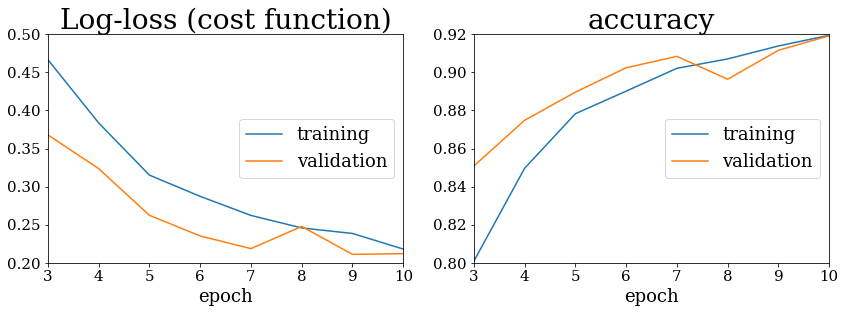

Log-loss (cost function):
training   (min:    0.218, max:    0.682, cur:    0.218)
validation (min:    0.211, max:    0.656, cur:    0.212)

accuracy:
training   (min:    0.571, max:    0.919, cur:    0.919)
validation (min:    0.569, max:    0.919, cur:    0.919)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 218, 178, 2)       56        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 178, 2)       38        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 89, 2)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 89, 4)        76        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 89, 4)      

In [5]:
%%time
cnn_g = Sequential()

input_img = (218, 178, 3)
batch_size=32
epochs=10

# layer 1
cnn_g.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_g.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_g.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 3
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 4
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_g.add(Flatten())
cnn_g.add(Dense(64, activation='relu'))
cnn_g.add(Dropout(0.5))
cnn_g.add(Dense(32, activation='relu'))
cnn_g.add(Dropout(0.5))
cnn_g.add(Dense(16, activation='relu'))
cnn_g.add(Dropout(0.5))
cnn_g.add(Dense(1, activation='sigmoid'))

cnn_g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_g.fit(X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

cnn_g.summary()

In [6]:
saved_model_path = "../saved_models/gender_11_7.h5"
cnn_g.save(saved_model_path)

# Model 1

In [69]:
input_img = Input(shape=(200, 200, 3)) 

x = Conv2D(40, (3, 3), activation='relu', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(20, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(20, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
# x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

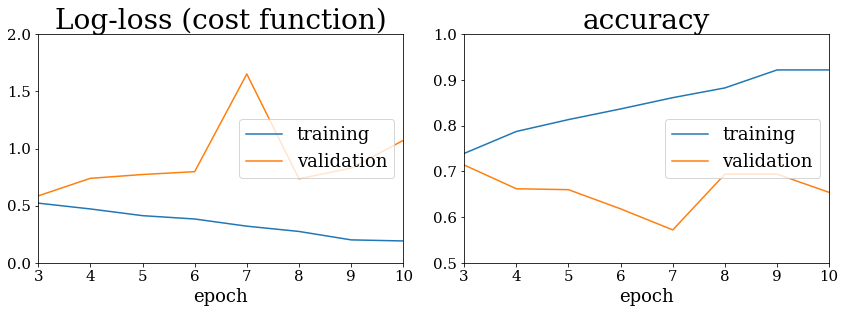

Log-loss (cost function):
training   (min:    0.191, max:    0.707, cur:    0.191)
validation (min:    0.586, max:    1.653, cur:    1.071)

accuracy:
training   (min:    0.657, max:    0.922, cur:    0.922)
validation (min:    0.516, max:    0.714, cur:    0.654)


In [71]:
cnn.fit(X_train, y_train,
          epochs=10,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesCallback()],
          verbose=1)

#### Male Training

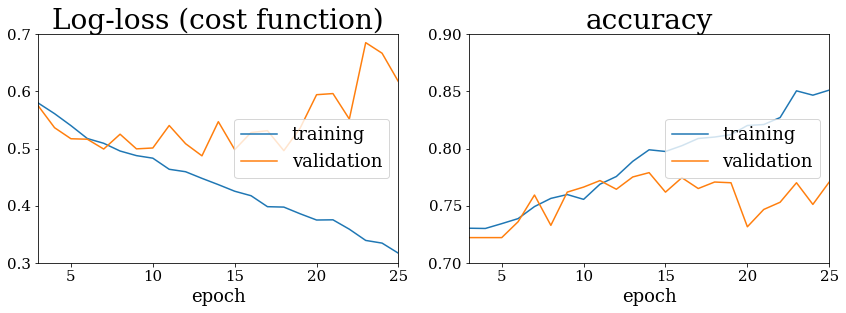

Log-loss (cost function):
training   (min:    0.317, max:    0.673, cur:    0.317)
validation (min:    0.487, max:    0.685, cur:    0.617)

accuracy:
training   (min:    0.681, max:    0.851, cur:    0.851)
validation (min:    0.722, max:    0.779, cur:    0.771)
Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 200, 200, 2)       56        
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 100, 100, 4)       76

In [59]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=25

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn_m = Model(input_img, output)
cnn_m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_m.fit(X_train, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn_m.summary()

#### Simplified model by taking out covd layers and 1 FC layer

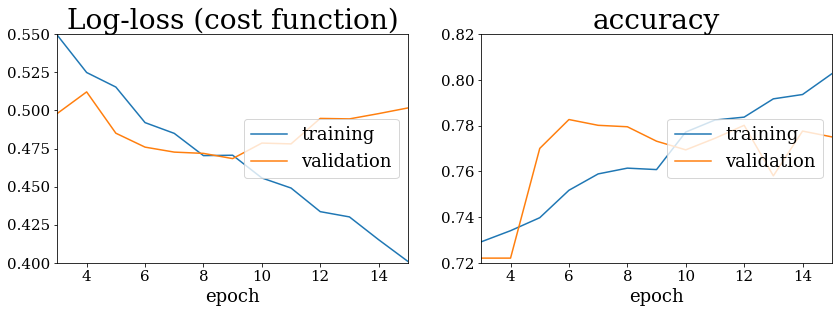

Log-loss (cost function):
training   (min:    0.401, max:    0.660, cur:    0.401)
validation (min:    0.468, max:    0.597, cur:    0.502)

accuracy:
training   (min:    0.671, max:    0.803, cur:    0.803)
validation (min:    0.722, max:    0.783, cur:    0.775)
Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_148 (Conv2D)          (None, 200, 200, 2)       56        
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 200, 200, 2)       0         
_________________________________________________________________
conv2d_149 (Conv2D)          (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_68 (MaxPooling (None, 100, 100, 2)       0 

In [68]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=15

x = Conv2D(2, (3, 3), padding='same')(input_img)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn_m_leak = Model(input_img, output)
cnn_m_leak.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_m_leak.fit(X_train, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn_m_leak.summary()

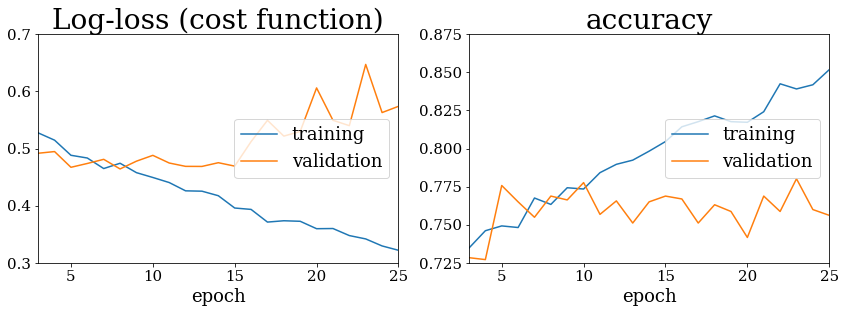

Log-loss (cost function):
training   (min:    0.322, max:    0.616, cur:    0.322)
validation (min:    0.464, max:    0.647, cur:    0.574)

accuracy:
training   (min:    0.706, max:    0.852, cur:    0.852)
validation (min:    0.722, max:    0.780, cur:    0.756)
Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 200, 200, 2)       56        
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 200, 200, 2)       0         
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 200, 200, 2)       38        
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 200, 200, 2)       0 

In [71]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=25

x = Conv2D(2, (3, 3), padding='same')(input_img)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(2, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn_m_leak = Model(input_img, output)
cnn_m_leak.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_m_leak.fit(X_train, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn_m_leak.summary()

In [79]:
score_train = cnn_m_leak.evaluate(X_train, y_train, verbose=0)
score_test = cnn_m_leak.evaluate(X_test, y_test, verbose=0)

In [93]:
# y_pred = cnn_m_leak.predict(X_test)
# cnn_m_leak.classification_report(y_test, y_pred)
cnn_m_leak.history.on_predict__end(X_test)

In [80]:
print (score_train[1])
print (score_test[1])

0.876395046710968
0.7561591863632202


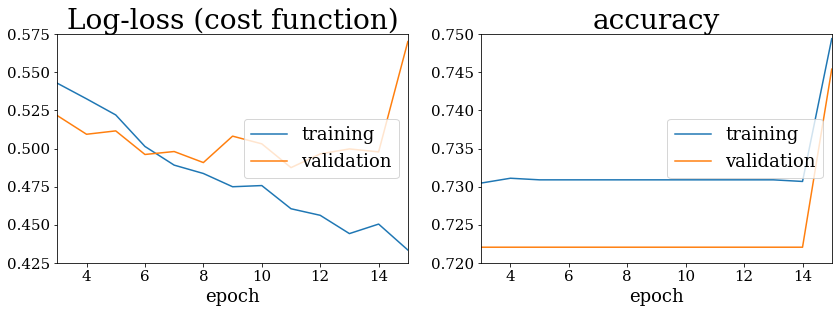

Log-loss (cost function):
training   (min:    0.433, max:    0.611, cur:    0.433)
validation (min:    0.487, max:    0.570, cur:    0.570)

accuracy:
training   (min:    0.724, max:    0.749, cur:    0.749)
validation (min:    0.722, max:    0.745, cur:    0.745)
Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_157 (Conv2D)          (None, 200, 200, 2)       56        
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 200, 200, 2)       0         
_________________________________________________________________
conv2d_158 (Conv2D)          (None, 200, 200, 2)       38        
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 200, 200, 2)       0 

In [69]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=15

x = Conv2D(2, (3, 3), padding='same')(input_img)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(2, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(4, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(8, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn_m_leak = Model(input_img, output)
cnn_m_leak.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_m_leak.fit(X_train, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn_m_leak.summary()

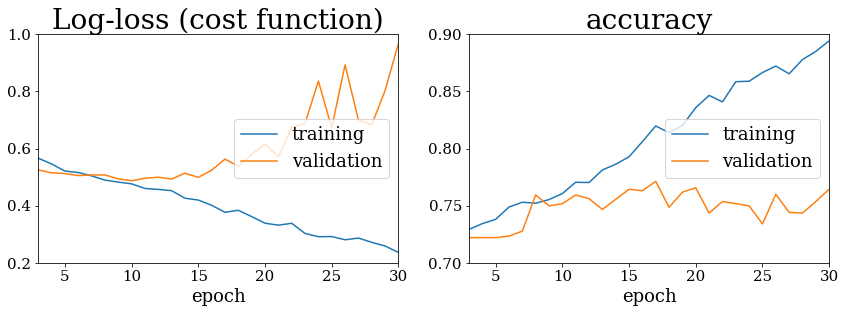

Log-loss (cost function):
training   (min:    0.236, max:    0.668, cur:    0.236)
validation (min:    0.487, max:    0.968, cur:    0.968)

accuracy:
training   (min:    0.664, max:    0.894, cur:    0.894)
validation (min:    0.722, max:    0.771, cur:    0.764)
Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 200, 200, 2)       56        
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 200, 200, 2)       0         
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 200, 200, 2)       38        
_________________________________________________________________
leaky_re_lu_13 (LeakyReLU)   (None, 200, 200, 2)       0 

In [70]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=30

x = Conv2D(2, (3, 3), padding='same')(input_img)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(2, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(4, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(8, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = Conv2D(16, (3, 3), padding='same')(x)
x = LeakyReLU(alpha=0.01)(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn_m_leak = Model(input_img, output)
cnn_m_leak.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn_m_leak.fit(X_train, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn_m_leak.summary()

## Model 2

#### Changed the filters to powers of 2 and added dropout to combat overfitting

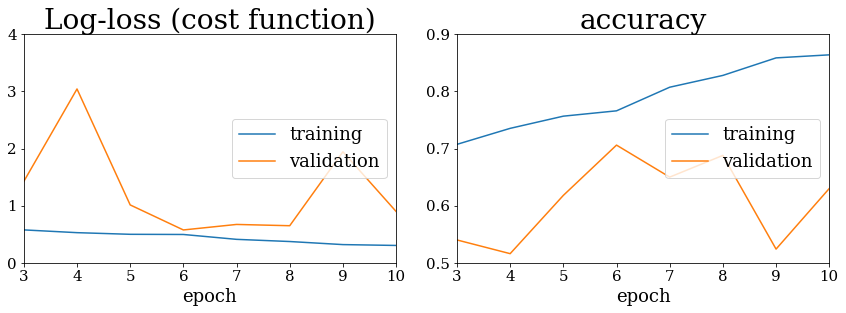

Log-loss (cost function):
training   (min:    0.304, max:    0.691, cur:    0.304)
validation (min:    0.575, max:    3.043, cur:    0.899)

accuracy:
training   (min:    0.648, max:    0.864, cur:    0.864)
validation (min:    0.500, max:    0.706, cur:    0.630)


In [72]:
input_img = Input(shape=(200, 200, 3)) 

x = Conv2D(64, (3, 3), activation='relu', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train, y_train,
          epochs=10,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesCallback()],
          verbose=1)

# Model 3

#### Doubling Filters since Google doubles in their model

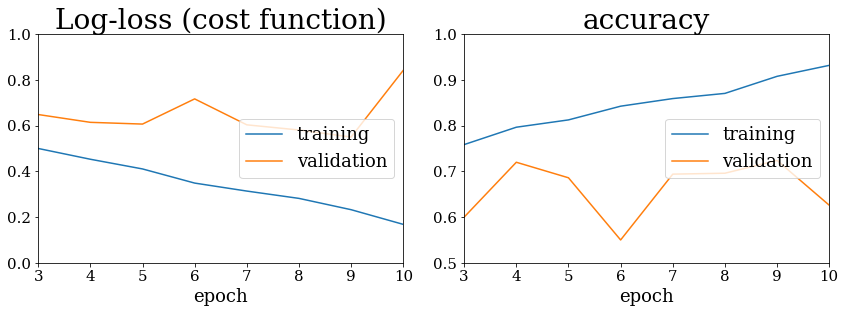

Log-loss (cost function):
training   (min:    0.168, max:    0.733, cur:    0.168)
validation (min:    0.550, max:    0.842, cur:    0.842)

accuracy:
training   (min:    0.639, max:    0.932, cur:    0.932)
validation (min:    0.544, max:    0.724, cur:    0.626)


In [73]:
input_img = Input(shape=(200, 200, 3)) 

x = Conv2D(8, (3, 3), activation='relu', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.25)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train, y_train,
          epochs=10,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesCallback()],
          verbose=1)

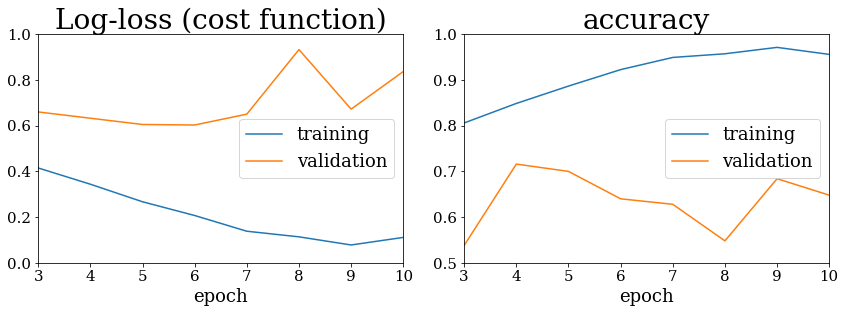

Log-loss (cost function):
training   (min:    0.078, max:    0.629, cur:    0.111)
validation (min:    0.603, max:    0.933, cur:    0.837)

accuracy:
training   (min:    0.697, max:    0.971, cur:    0.956)
validation (min:    0.484, max:    0.716, cur:    0.648)
CPU times: user 21min 39s, sys: 8min 38s, total: 30min 17s
Wall time: 7min


In [85]:
%%time
activation=['softsign', 'relu']
for i in activation:    
    input_img = Input(shape=(200, 200, 3)) 

    batch_size=32
    epochs=10

    x = Conv2D(8, (3, 3), activation=i, padding='valid')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(16, (3, 3), activation=i, padding='valid')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation=i, padding='valid')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation=i, padding='valid')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.25)(x)
    output = Dense(1, activation='sigmoid')(x)

    cnn = Model(input_img, output)
    cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    cnn.summary()

    cnn.fit(X_train, y_train,
              epochs=epochs,
              batch_size=batch_size,
              validation_data=(X_test, y_test),
              callbacks=[PlotLossesCallback()],
              verbose=1)

# Model Male - Attraction

#### Changed dropout and usig softsign

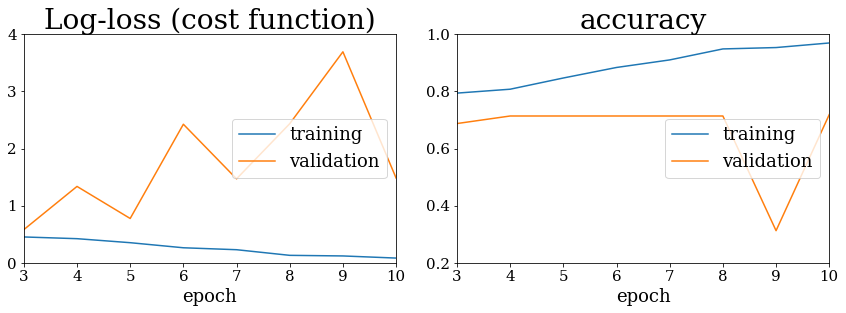

Log-loss (cost function):
training   (min:    0.083, max:    0.736, cur:    0.083)
validation (min:    0.581, max:    5.884, cur:    1.484)

accuracy:
training   (min:    0.646, max:    0.970, cur:    0.970)
validation (min:    0.286, max:    0.719, cur:    0.719)


In [49]:
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=10

x = Conv2D(8, (3, 3), activation='softsign', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='softsign', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='softsign', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='softsign', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesCallback()],
          verbose=1)

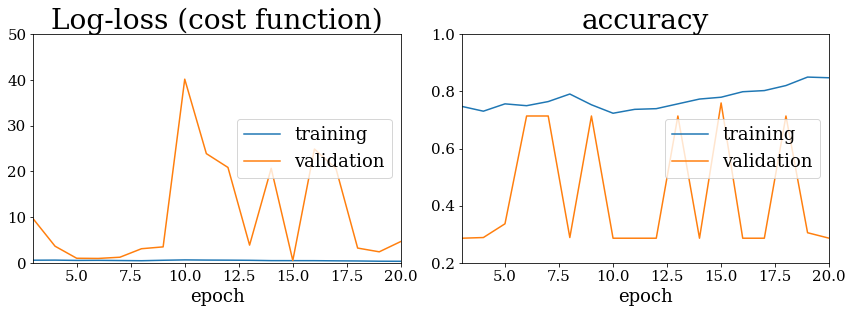

Log-loss (cost function):
training   (min:    0.332, max:    0.806, cur:    0.332)
validation (min:    0.505, max:   40.176, cur:    4.666)

accuracy:
training   (min:    0.583, max:    0.850, cur:    0.848)
validation (min:    0.286, max:    0.760, cur:    0.286)


In [52]:
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=20

x = Conv2D(8, (3, 3), activation='softsign', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='softsign', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='softsign', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='softsign', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.75)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train, y_train,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test, y_test),
          callbacks=[PlotLossesCallback()],
          verbose=1)

# Model Female - Attraction

#### Changed dropout and usig softsign

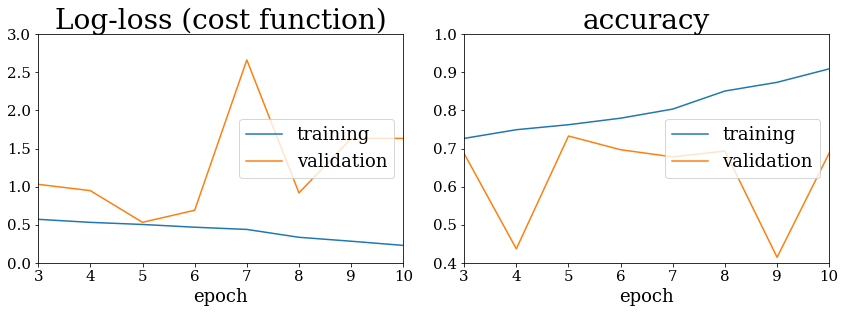

Log-loss (cost function):
training   (min:    0.228, max:    0.805, cur:    0.228)
validation (min:    0.531, max:    2.663, cur:    1.633)

accuracy:
training   (min:    0.608, max:    0.909, cur:    0.909)
validation (min:    0.414, max:    0.733, cur:    0.688)


In [50]:
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=10

x = Conv2D(8, (3, 3), activation='softsign', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='softsign', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='softsign', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='softsign', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

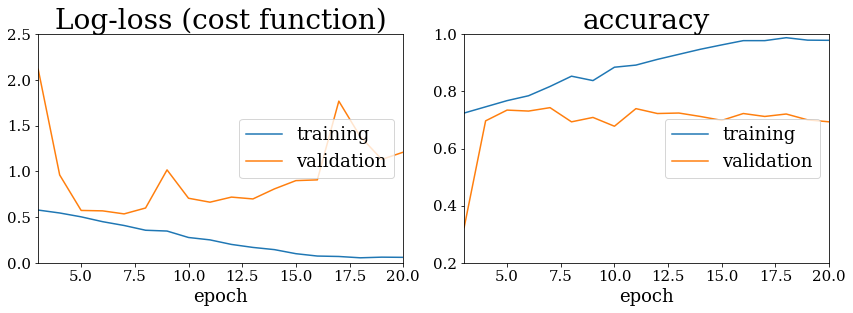

Log-loss (cost function):
training   (min:    0.055, max:    0.735, cur:    0.060)
validation (min:    0.535, max:    3.452, cur:    1.210)

accuracy:
training   (min:    0.639, max:    0.988, cur:    0.979)
validation (min:    0.324, max:    0.743, cur:    0.693)


In [53]:
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=20

x = Conv2D(8, (3, 3), activation='relu', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

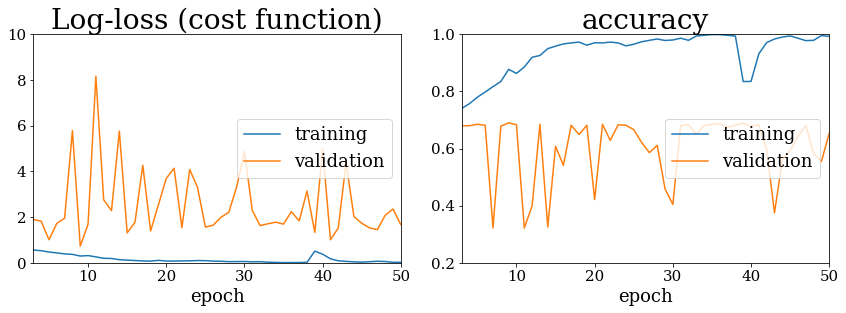

Log-loss (cost function):
training   (min:    0.009, max:    0.730, cur:    0.022)
validation (min:    0.731, max:    8.161, cur:    1.673)

accuracy:
training   (min:    0.639, max:    0.999, cur:    0.993)
validation (min:    0.322, max:    0.690, cur:    0.654)
CPU times: user 1h 1min 52s, sys: 23min 31s, total: 1h 25min 23s
Wall time: 15min 18s


In [54]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=50

x = Conv2D(8, (3, 3), activation='softsign', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='softsign', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

#### padding changed to 'same'

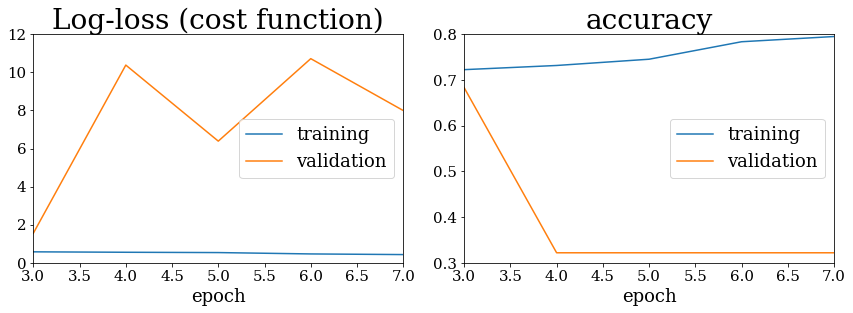

Log-loss (cost function):
training   (min:    0.432, max:    0.818, cur:    0.432)
validation (min:    0.619, max:   10.720, cur:    7.996)

accuracy:
training   (min:    0.620, max:    0.795, cur:    0.795)
validation (min:    0.322, max:    0.690, cur:    0.322)
CPU times: user 9min 39s, sys: 3min 37s, total: 13min 16s
Wall time: 2min 31s


In [55]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=7

x = Conv2D(8, (3, 3), activation='softsign', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='softsign', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

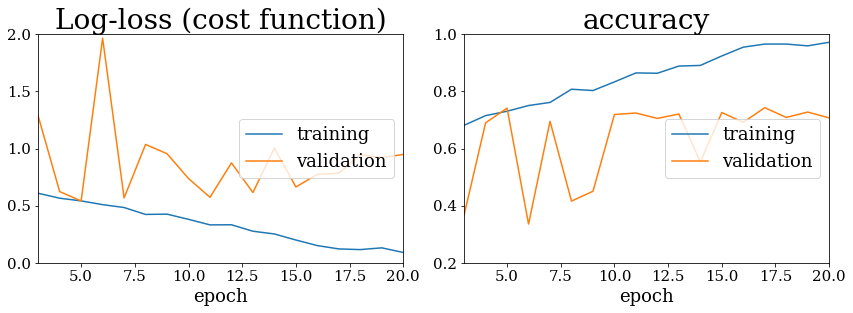

Log-loss (cost function):
training   (min:    0.090, max:    0.736, cur:    0.090)
validation (min:    0.541, max:    1.965, cur:    0.948)

accuracy:
training   (min:    0.572, max:    0.972, cur:    0.972)
validation (min:    0.336, max:    0.743, cur:    0.707)
CPU times: user 21min 19s, sys: 7min 18s, total: 28min 38s
Wall time: 5min 25s


In [84]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=20

x = Conv2D(8, (3, 3), activation='relu', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

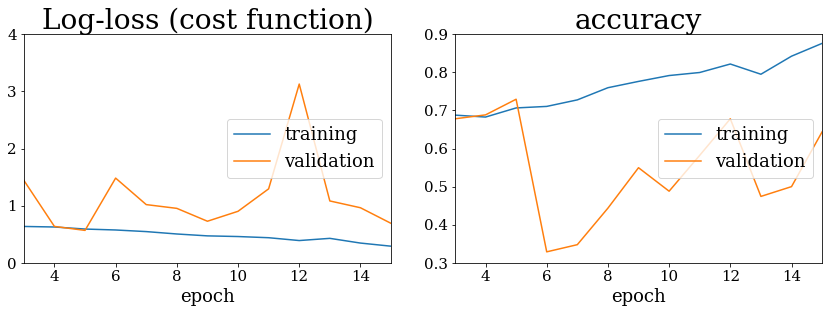

Log-loss (cost function):
training   (min:    0.291, max:    0.754, cur:    0.291)
validation (min:    0.567, max:    3.936, cur:    0.691)

accuracy:
training   (min:    0.606, max:    0.876, cur:    0.876)
validation (min:    0.329, max:    0.729, cur:    0.644)
CPU times: user 13min 8s, sys: 3min 44s, total: 16min 52s
Wall time: 3min 5s


In [85]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=15

x = Conv2D(4, (3, 3), activation='relu', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

#### same filters in all layers

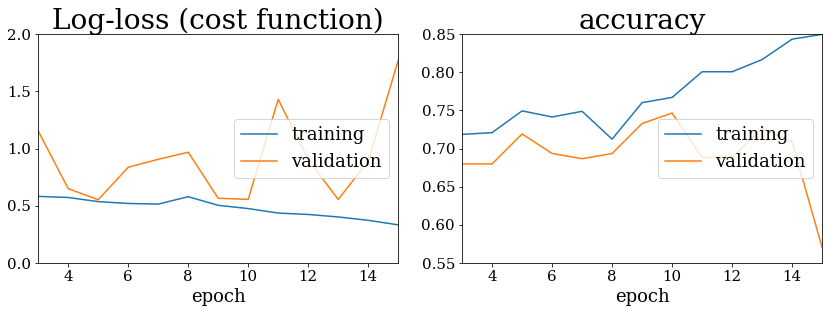

Log-loss (cost function):
training   (min:    0.332, max:    0.759, cur:    0.332)
validation (min:    0.552, max:    2.269, cur:    1.772)

accuracy:
training   (min:    0.617, max:    0.850, cur:    0.850)
validation (min:    0.570, max:    0.747, cur:    0.570)
CPU times: user 36min 53s, sys: 15min 5s, total: 51min 58s
Wall time: 9min 41s


In [86]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=15

x = Conv2D(32, (3, 3), activation='relu', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

#### Changed first layer to tanh

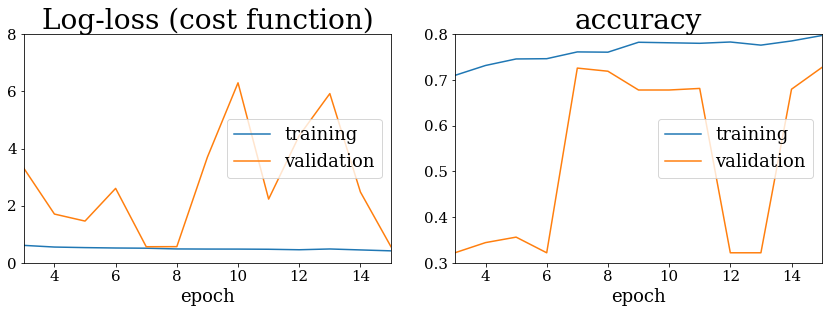

Log-loss (cost function):
training   (min:    0.418, max:    0.712, cur:    0.418)
validation (min:    0.561, max:    8.228, cur:    0.561)

accuracy:
training   (min:    0.640, max:    0.797, cur:    0.797)
validation (min:    0.322, max:    0.728, cur:    0.728)
CPU times: user 38min 13s, sys: 15min 36s, total: 53min 50s
Wall time: 10min 3s


In [88]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=15

x = Conv2D(32, (3, 3), activation='tanh', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

#### changed fully connected layer  |  Tanh back to relu

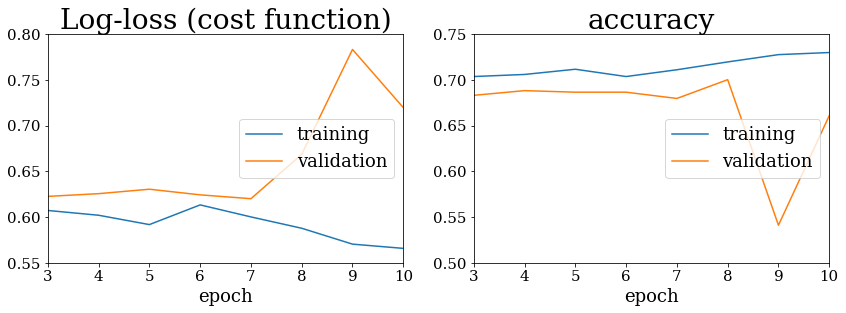

Log-loss (cost function):
training   (min:    0.566, max:    9.011, cur:    0.566)
validation (min:    0.620, max:    0.783, cur:    0.720)

accuracy:
training   (min:    0.661, max:    0.730, cur:    0.730)
validation (min:    0.541, max:    0.700, cur:    0.661)


In [90]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=10

x = Conv2D(32, (3, 3), activation='relu', padding='valid')(input_img)
x = MaxPooling2D((2, 2), padding='valid')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='valid')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='valid')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='valid')(x)
x = MaxPooling2D((2, 2), padding='valid')(x)
x = Flatten()(x)
x = Dense(3872, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

#### Copying VGG16's architecture  |  double conv2d layers then max pool  |  no dropout

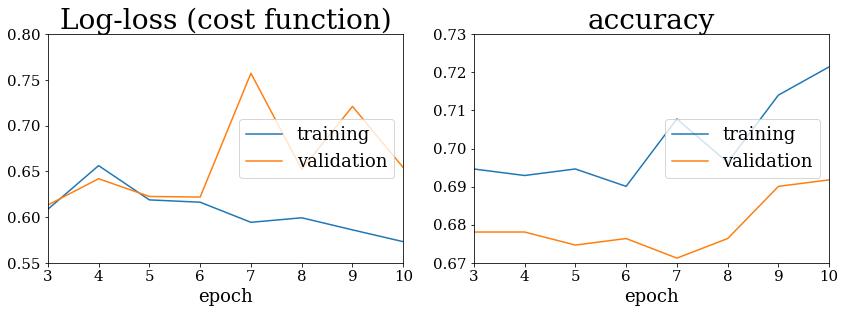

Log-loss (cost function):
training   (min:    0.573, max:   16.181, cur:    0.573)
validation (min:    0.612, max:    0.757, cur:    0.654)

accuracy:
training   (min:    0.671, max:    0.721, cur:    0.721)
validation (min:    0.671, max:    0.692, cur:    0.692)
CPU times: user 4h 34min 46s, sys: 1h 57min 15s, total: 6h 32min 1s
Wall time: 1h 14min 14s


In [93]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=10

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(3872, activation='relu')(x)
x = Dense(512, activation='relu')(x)
x = Dense(64, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

In [99]:
saved_model_path = "saved_models/female_VGG16_attract_11_7.h5"
# Save entire model to a HDF5 file
cnn.save(saved_model_path)

# Day 5

#### Loading in trained model from 11/7

In [16]:
saved_model_path = "saved_models/female_VGG16_attract_11_7.h5"
model = keras.models.load_model(saved_model_path)

In [18]:
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_63 (MaxPooling (None, 50, 50, 64)        0  

#### Simple architecture

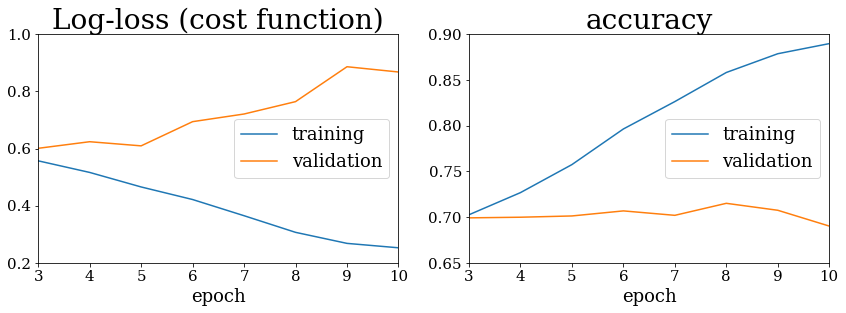

Log-loss (cost function):
training   (min:    0.253, max:   32.333, cur:    0.253)
validation (min:    0.598, max:    0.886, cur:    0.868)

accuracy:
training   (min:    0.653, max:    0.890, cur:    0.890)
validation (min:    0.687, max:    0.715, cur:    0.690)
CPU times: user 39min 21s, sys: 10min 53s, total: 50min 15s
Wall time: 9min 24s


In [18]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=10

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(80, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

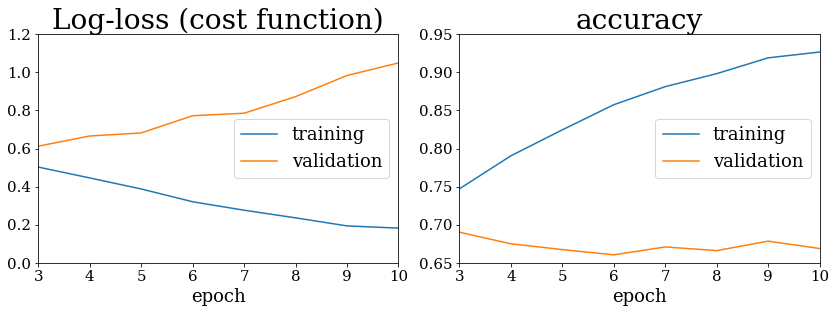

Log-loss (cost function):
training   (min:    0.182, max:    0.755, cur:    0.182)
validation (min:    0.603, max:    1.050, cur:    1.050)

accuracy:
training   (min:    0.668, max:    0.927, cur:    0.927)
validation (min:    0.660, max:    0.699, cur:    0.669)
CPU times: user 18min 24s, sys: 3min 16s, total: 21min 41s
Wall time: 3min 53s


In [22]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=10

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

#### Added more data  |  1 more layer

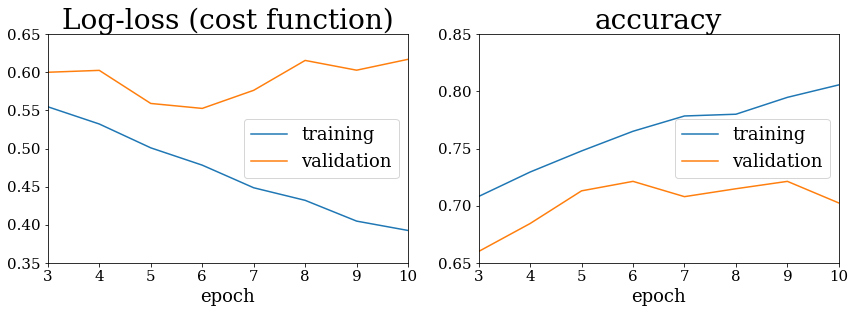

Log-loss (cost function):
training   (min:    0.392, max:    1.001, cur:    0.392)
validation (min:    0.553, max:    0.617, cur:    0.617)

accuracy:
training   (min:    0.674, max:    0.806, cur:    0.806)
validation (min:    0.660, max:    0.721, cur:    0.702)
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 2)       56        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 4)       76        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 50, 50, 4)         0  

In [19]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=10

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

#### Simple VGG16 Architecture  |  Add a FC

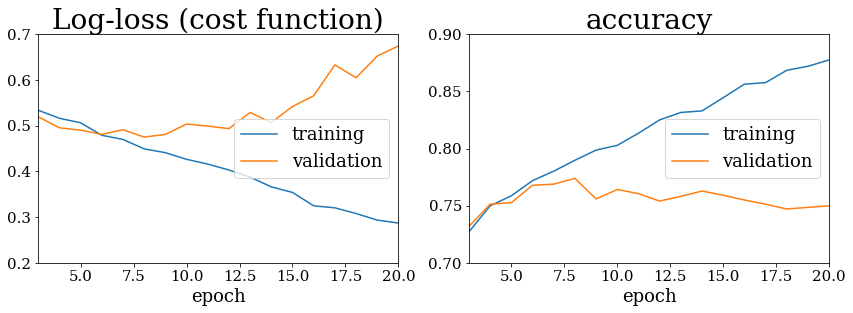

Log-loss (cost function):
training   (min:    0.287, max:    0.611, cur:    0.287)
validation (min:    0.475, max:    0.674, cur:    0.674)

accuracy:
training   (min:    0.686, max:    0.878, cur:    0.878)
validation (min:    0.681, max:    0.774, cur:    0.750)
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 200, 200, 2)       56        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 100, 4)       76 

In [20]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=20

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

#### Add a CNN Layer  |  Add another Dense Layer

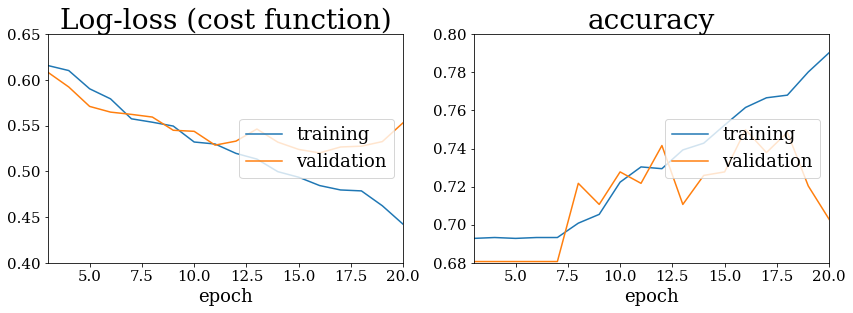

Log-loss (cost function):
training   (min:    0.442, max:    0.642, cur:    0.442)
validation (min:    0.520, max:    0.629, cur:    0.553)

accuracy:
training   (min:    0.682, max:    0.790, cur:    0.790)
validation (min:    0.681, max:    0.750, cur:    0.703)
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 200, 200, 2)       56        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 100, 100, 4)       76 

In [21]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=20

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

#### Checking for more FC nodes

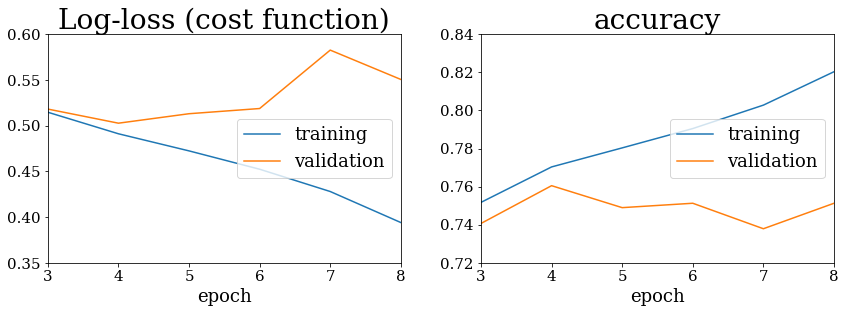

Log-loss (cost function):
training   (min:    0.394, max:    0.596, cur:    0.394)
validation (min:    0.503, max:    0.583, cur:    0.551)

accuracy:
training   (min:    0.696, max:    0.820, cur:    0.820)
validation (min:    0.693, max:    0.760, cur:    0.751)
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 200, 200, 2)       56        
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 100, 100, 4)       76 

In [22]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=8

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

#### Added a FC layer with dropout to combat overfitting

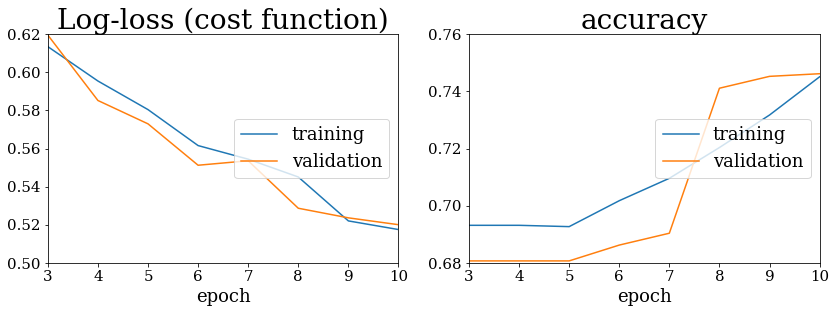

Log-loss (cost function):
training   (min:    0.517, max:    0.640, cur:    0.517)
validation (min:    0.520, max:    0.632, cur:    0.520)

accuracy:
training   (min:    0.681, max:    0.745, cur:    0.745)
validation (min:    0.681, max:    0.746, cur:    0.746)
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 200, 200, 2)       56        
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 100, 100, 4)       76 

In [23]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=10

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

#### Simplified and changed the kernal size (7,7) but keeping size

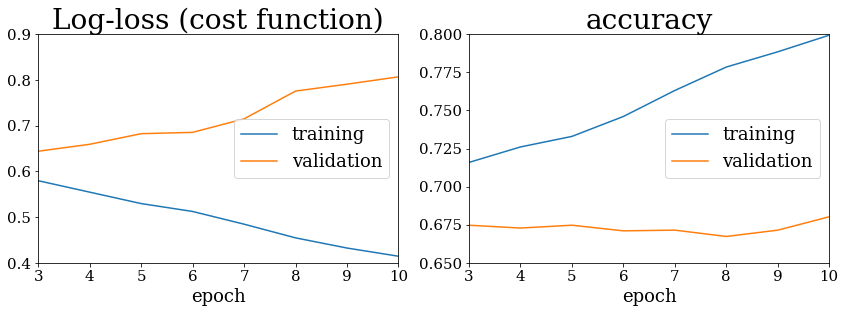

Log-loss (cost function):
training   (min:    0.414, max:    3.175, cur:    0.414)
validation (min:    0.642, max:    0.807, cur:    0.807)

accuracy:
training   (min:    0.653, max:    0.799, cur:    0.799)
validation (min:    0.667, max:    0.680, cur:    0.680)
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 200, 200, 2)       296       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 100, 100, 4)       76        
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 50, 50, 4)         0  

In [25]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=10

x = Conv2D(2, (7, 7), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

#### Kernal Size (5,5)

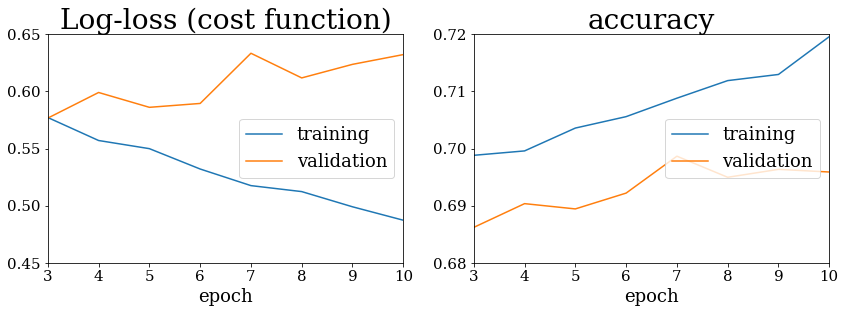

Log-loss (cost function):
training   (min:    0.487, max:    5.767, cur:    0.487)
validation (min:    0.577, max:    0.633, cur:    0.632)

accuracy:
training   (min:    0.658, max:    0.720, cur:    0.720)
validation (min:    0.681, max:    0.699, cur:    0.696)
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 200, 200, 2)       152       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 100, 100, 4)       76        
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 50, 50, 4)         0  

In [26]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=10

x = Conv2D(2, (5, 5), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

#### more filters

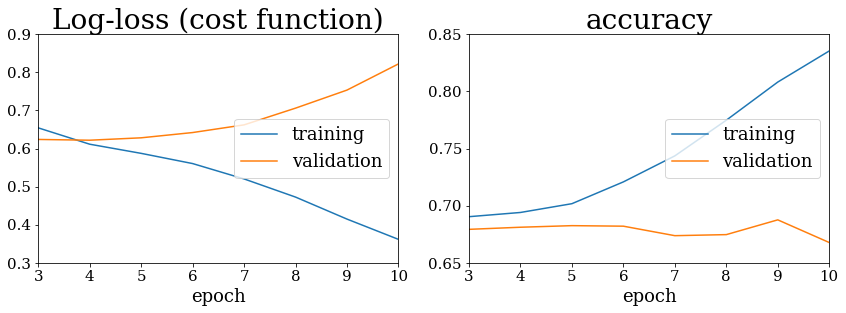

Log-loss (cost function):
training   (min:    0.362, max:    6.476, cur:    0.362)
validation (min:    0.593, max:    0.822, cur:    0.822)

accuracy:
training   (min:    0.676, max:    0.835, cur:    0.835)
validation (min:    0.668, max:    0.688, cur:    0.668)
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 200, 200, 32)      2432      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 50, 50, 32)        0  

In [27]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=10

x = Conv2D(32, (5, 5), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

#### More Epochs

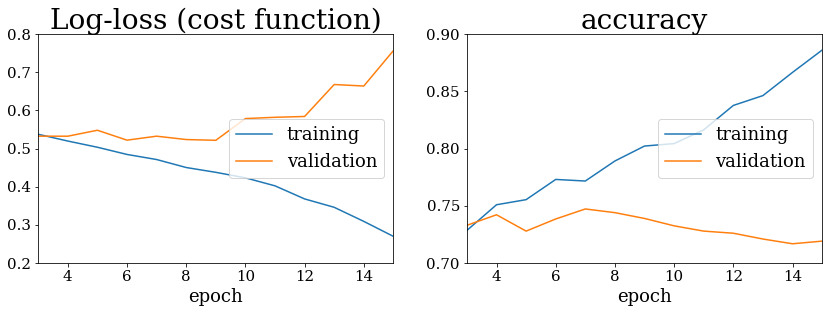

Log-loss (cost function):
training   (min:    0.269, max:    0.642, cur:    0.269)
validation (min:    0.522, max:    0.757, cur:    0.757)

accuracy:
training   (min:    0.683, max:    0.886, cur:    0.886)
validation (min:    0.681, max:    0.747, cur:    0.719)
Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 200, 200, 2)       56        
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 100, 100, 4)       76

In [29]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=15

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

#### More epochs

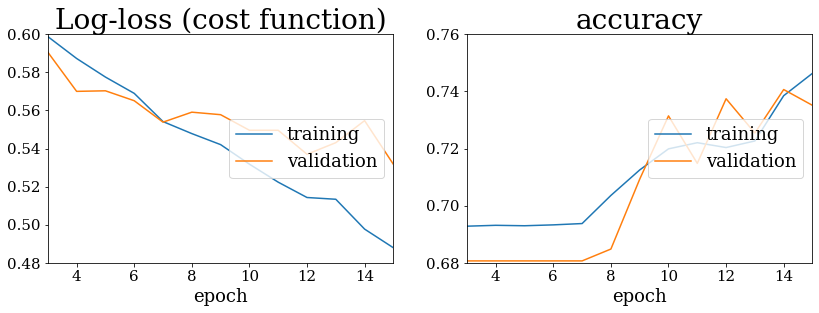

Log-loss (cost function):
training   (min:    0.488, max:    0.655, cur:    0.488)
validation (min:    0.532, max:    0.623, cur:    0.532)

accuracy:
training   (min:    0.674, max:    0.746, cur:    0.746)
validation (min:    0.681, max:    0.741, cur:    0.735)
Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 200, 200, 2)       56        
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 100, 100, 4)       76

In [31]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=15

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

In [48]:
male_proba = cnn.predict_proba(X_test1)
male_proba

AttributeError: 'Model' object has no attribute 'predict_proba'

In [52]:
cnn.predict_proba(X_test1)

AttributeError: 'Model' object has no attribute 'predict_proba'

In [54]:
cnn.

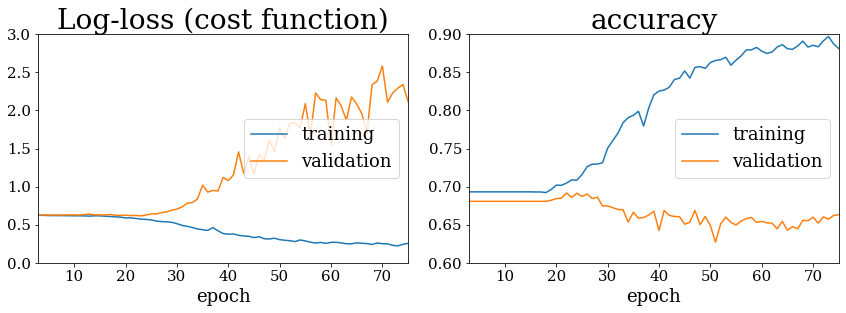

Log-loss (cost function):
training   (min:    0.222, max:    0.646, cur:    0.255)
validation (min:    0.615, max:    2.583, cur:    2.118)

accuracy:
training   (min:    0.679, max:    0.897, cur:    0.881)
validation (min:    0.627, max:    0.692, cur:    0.663)
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 200, 200, 2)       56        
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 100, 100, 4)       76

In [55]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=75

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

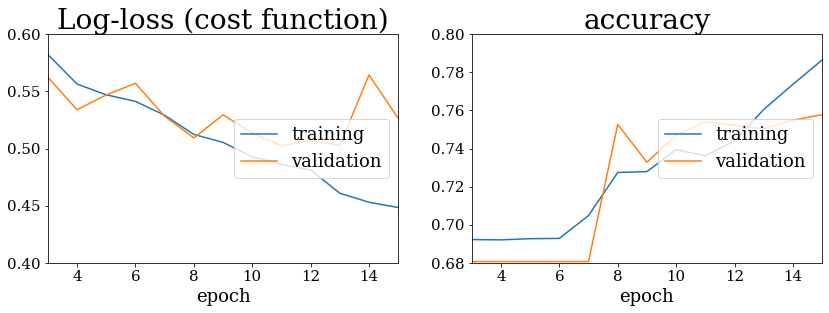

Log-loss (cost function):
training   (min:    0.448, max:    0.668, cur:    0.448)
validation (min:    0.502, max:    0.620, cur:    0.526)

accuracy:
training   (min:    0.649, max:    0.786, cur:    0.786)
validation (min:    0.681, max:    0.758, cur:    0.758)
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 200, 200, 2)       56        
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 100, 100, 4)       76

In [57]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=15

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn = Model(input_img, output)
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn.summary()

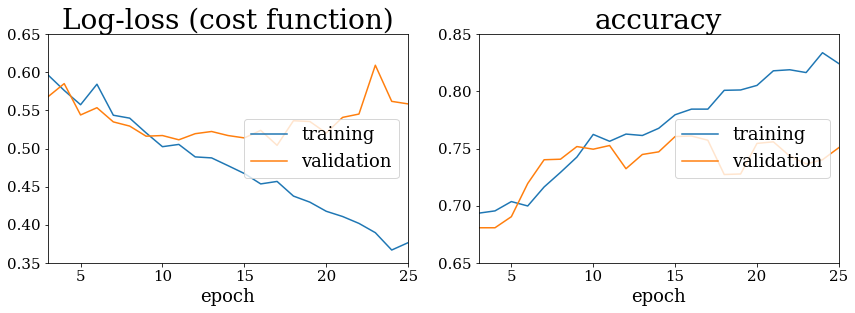

Log-loss (cost function):
training   (min:    0.367, max:    0.662, cur:    0.376)
validation (min:    0.504, max:    0.624, cur:    0.559)

accuracy:
training   (min:    0.662, max:    0.834, cur:    0.824)
validation (min:    0.681, max:    0.761, cur:    0.751)
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 200, 200, 2)       56        
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 200, 200, 2)       38        
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 100, 100, 2)       0         
_________________________________________________________________
conv2d_96 (Conv2D)           (None, 100, 100, 4)       76

In [58]:
%%time
input_img = Input(shape=(200, 200, 3)) 

batch_size=32
epochs=25

x = Conv2D(2, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(2, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(4, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), strides=(2,2))(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(16, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

cnn1 = Model(input_img, output)
cnn1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn1.fit(X_train1, y_train1,
          epochs=epochs,
          batch_size=batch_size,
          validation_data=(X_test1, y_test1),
          callbacks=[PlotLossesCallback()],
          verbose=1)

cnn1.summary()